In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [6]:
#!pip install adtk #anomaly detectiont tool kit

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import *

In [31]:
# data gathered from https://datahub.io/core/global-temp
dataset = pd.read_csv('flat-ui__data-Fri Dec 27 2024.csv')
dataset = dataset[['Year', 'Mean']]
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
dataset.head()

,Year,Mean
0,1850-01-01,-0.4177
1,1851-01-01,-0.2333
2,1852-01-01,-0.2294
3,1853-01-01,-0.2704
4,1854-01-01,-0.2915


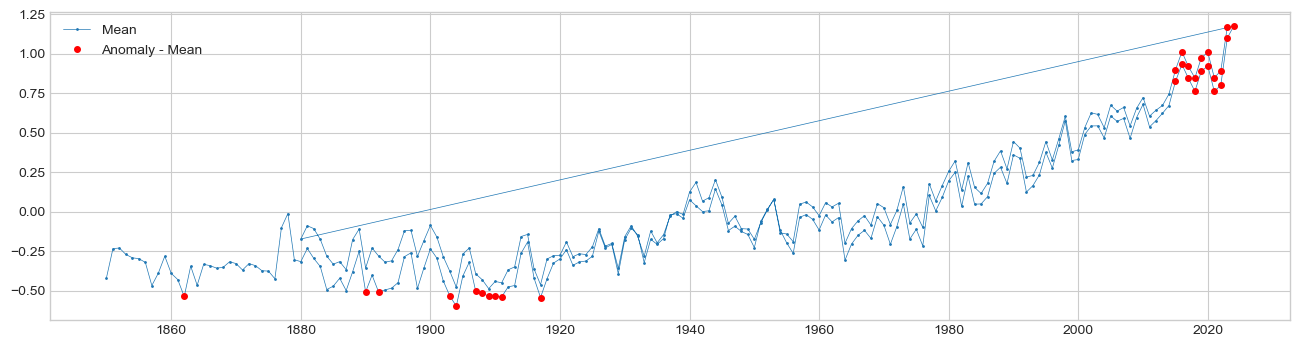

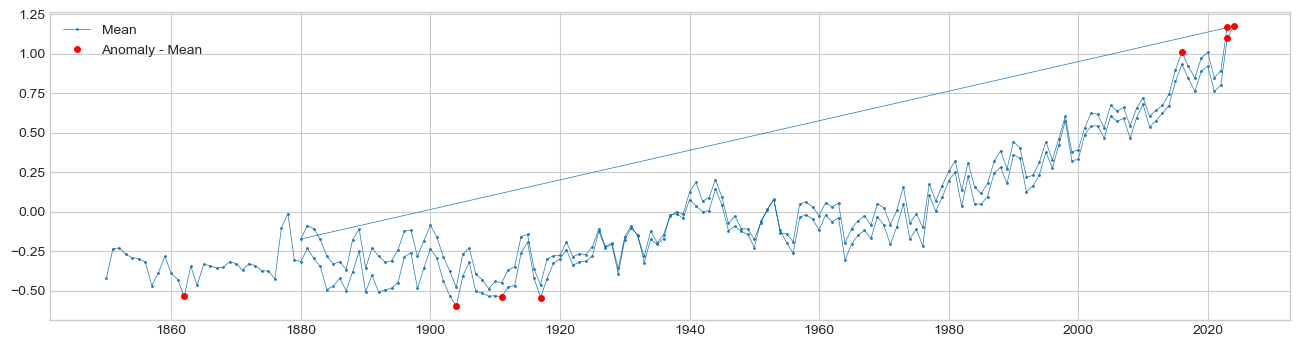

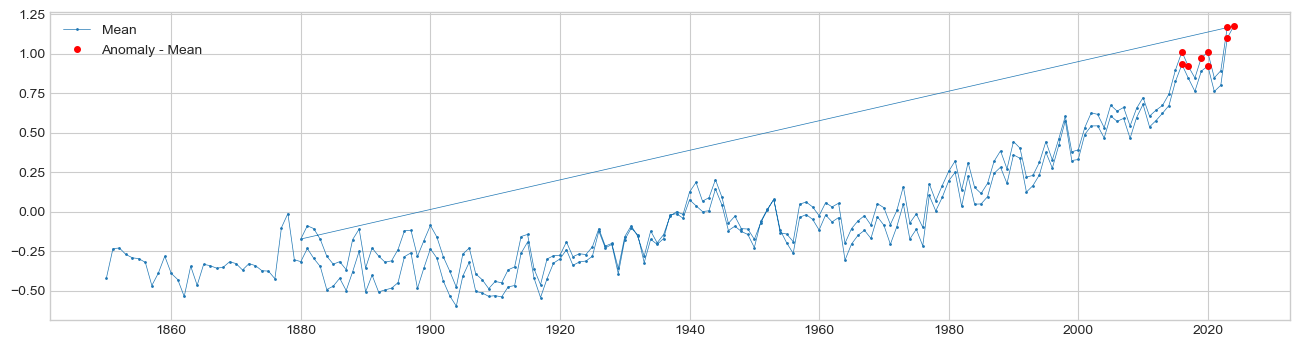

In [32]:
dataset.set_index('Year', inplace=True)

#Fixed
threshold_detector = ThresholdAD(low=-0.5, high=0.75)
    #Any value in the dataset that is less than -0.5 will be flagged as an anomaly.
    #Any value in the dataset that is greater than 0.75 will also be flagged as an anomaly.
    #If a value falls between -0.5 and 0.75, it is not considered an anomaly and is treated as normal.
    #This method is helpful when you have prior knowledge of acceptable value ranges and want a simple, rule-based anomaly detection approach.
anomalies = threshold_detector.detect(dataset)
plot(dataset, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()


#Dynamic
threshold_detector = QuantileAD(low=0.01, high=0.99) #1st percentile to 99th percentile
    #Any value in the dataset that is below the 1st percentile is flagged as an anomaly.
    #The 99th percentile is used as the upper threshold.
    #Values falling between the 1st and 99th percentiles are considered normal and not anomalies.
    #Why use percentile? It accounts for the variability of the dataset and automatically excludes extreme outliers.

#Unlike ThresholdAD, which uses fixed values for thresholds, QuantileAD dynamically adapts to the dataset's distribution. 
#This makes it particularly useful when the dataset's range is unknown or varies.Unlike ThresholdAD, which uses fixed values for thresholds, QuantileAD dynamically adapts to the dataset's distribution. This makes it particularly useful when the dataset's range is unknown or varies.
anomalies = threshold_detector.fit_detect(dataset)
plot(dataset, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()


#Interquartile Range
threshold_detector = InterQuartileRangeAD(c=1.5)  #try 2 will be less, try 1 will have more outliers
anomalies = threshold_detector.fit_detect(dataset)
plot(dataset, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()